# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

In [1]:
import pandas as pd
import numpy as np

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [2]:
x= []

for n in range(1995,2018):
    if n < 2000:
        skip = 3
    else:
        skip= 2
    filename= 'Precio_Bolsa_Nacional_($kwh)_'+str(n)
    if n >= 2016:
        filename += '.xls'
    else:
        filename += '.xlsx'
    y=pd.read_excel(filename, skiprows= skip, parse_cols = 24)
    x.append(y)
z=pd.concat(x)
print(len(z))
z.head()

7962


,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
len(z)-len(z.dropna())

28

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
len(z)-len(z.drop_duplicates())

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
z1=z.dropna().drop_duplicates()
len(z1)

7875

**5.--** Compute y grafique el precio promedio diario.

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [9]:
z1mean= z1.mean(axis=1)
z1mean

1       4.924333
2       1.269500
3       0.953083
4       4.305917
5       1.149167
6       1.108625
7       0.585958
8       0.499792
9       0.927667
10      0.669458
11      0.679458
12      1.106917
13      1.077500
14      1.517917
15      1.786042
16      2.383792
17      2.387583
18      3.707208
19      6.650000
20     13.991958
21     20.041667
22     21.191667
23     30.710750
24     34.327833
25     33.190250
26     14.513250
27      8.664333
28      1.813250
29      1.941667
30      1.101833
         ...    
13     69.696400
14     84.918995
15     89.348661
16     96.043590
17    111.541249
18    105.999284
19    110.215487
20    101.231979
21     75.254842
22    115.965815
23    148.968501
24    130.411958
25    144.226841
26    132.357035
27    122.145329
28    132.564871
29    133.677754
30    122.424193
31    103.459761
32    105.866599
33    110.059089
34    127.794467
35     90.072541
36    119.555657
37    146.880526
38    131.514214
39    133.727413
40    167.1281

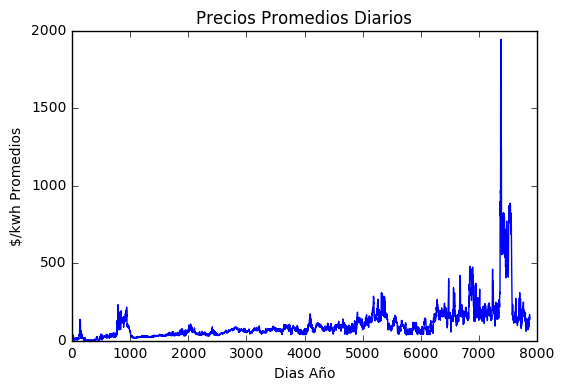

In [10]:
plt.xlabel('Dias Año')
plt.ylabel('$/kwh Promedios')
plt.title('Precios Promedios Diarios')
plt.plot(range(len(z1mean)),z1mean)
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [17]:
w=[]
for n in range(len(z1['Fecha'])):
    w.append(str(z1.iloc[n,0])[0:7])
z1['Mes Año'] = w
z2=z1.groupby('Mes Año').max()
z2=z1.max(axis=1)

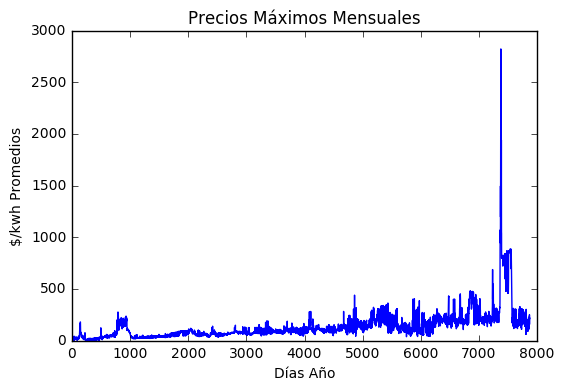

In [65]:
plt.xlabel('Días Año')
plt.ylabel('$/kwh Promedios')
plt.title('Precios Máximos Mensuales')
plt.plot(range(len(z2)), z2)
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.

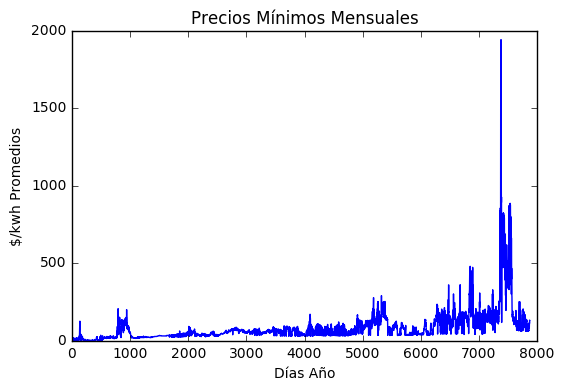

In [64]:
z3 = z1.groupby('Mes Año').min()
z3 = z1.min(axis=1)
plt.xlabel('Días Año')
plt.ylabel('$/kwh Promedios')
plt.title('Precios Mínimos Mensuales')
plt.plot(range(len(z3)), z3)
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

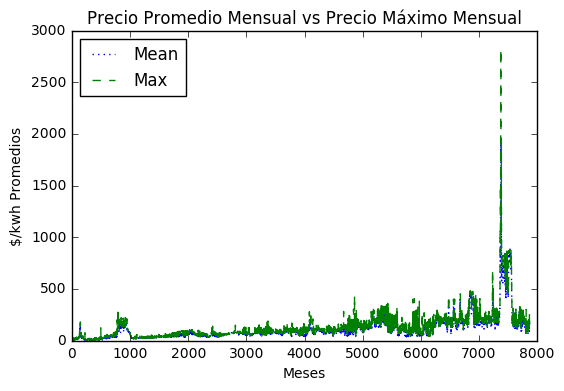

In [29]:
z4 = z1.groupby('Mes Año').mean()
z4 = z1.mean(axis=1)
plt.xlabel('Meses')
plt.ylabel('$/kwh Promedios')
plt.title('Precio Promedio Mensual vs Precio Máximo Mensual')
plt.plot(pd.Series(z4).values, label='Mean', linestyle=':')
plt.plot(pd.Series(z2).values, label='Max', linestyle='--')
plt.legend(loc="upper left")
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [35]:
from datetime import datetime, date, time, timedelta
import calendar

#Define los Dias de la semana en base a la Fecha
fecha=[]
fecha=z1['Fecha']
z1['Fecha']=pd.to_datetime(z1['Fecha'], format="%Y-%m-%d")
z1['Dia']=z1['Fecha'].dt.weekday_name

#Filtrado de Dias por Laborales.
Lab = z1['Dia'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
Lab = z1[Lab]

In [36]:
indicador = ['{}'.format(n) for n in range(len(Lab))]
Lab.index = indicador
#Lab.head()# A este nivel la Matriz ya no contiene 

In [37]:
u=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Lab)):
    x = pd.Series(Lab.loc[str(n)]).values[1:25]
    u.append ([i for i, e in enumerate(x) if e == max(x)])

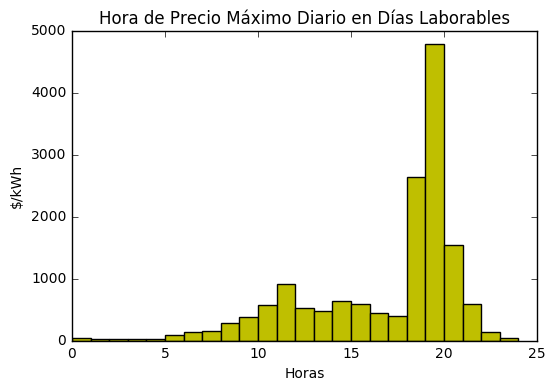

In [41]:
a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(u)):
    for i in range (len(u[n])):
        a.append(u[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.title('Hora de Precio Máximo Diario en Días Laborables')
plt.bar(range(24),rep,color='y',width = 1)
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

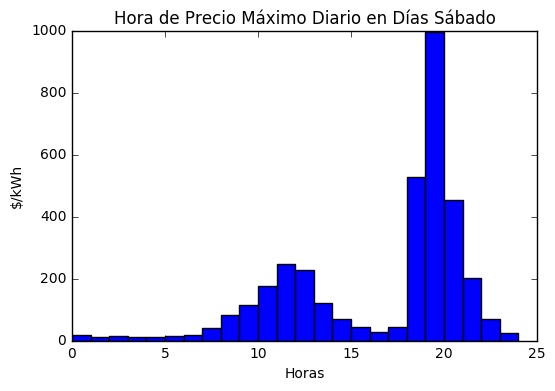

In [43]:
#Filtrado de Dias por Laborales.
Sab = z1['Dia'].isin(['Saturday'])
Sab = z1[Sab]

indicador = ['{}'.format(n) for n in range(len(Sab))]
Sab.index = indicador
#Lab.head()# A este nivel la Matriz ya no contiene 

s=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Sab)):
    x = pd.Series(Sab.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.title('Hora de Precio Máximo Diario en Días Sábado')
plt.bar(range(24),rep,color='b',width = 1)
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

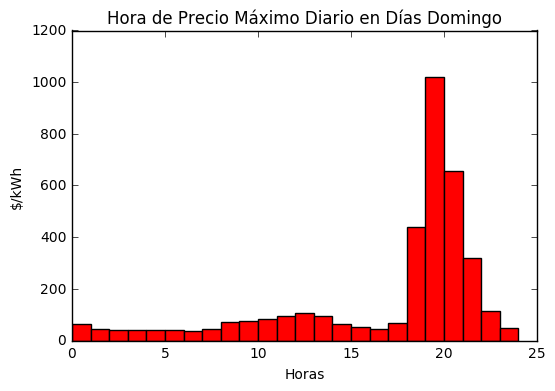

In [44]:
#Filtrado de Dias por Laborales.
Sab = z1['Dia'].isin(['Sunday'])
Sab = z1[Sab]

indicador = ['{}'.format(n) for n in range(len(Sab))]
Sab.index = indicador
#Lab.head()# A este nivel la Matriz ya no contiene 

s=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Sab)):
    x = pd.Series(Sab.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.title('Hora de Precio Máximo Diario en Días Domingo')
plt.bar(range(24),rep,color='r',width = 1)
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [62]:
A=[]
z5=z1
for n in range(len(z5['Fecha'])):
    A.append (str(z5.iloc[n,0])[0:4])
z5['Año']=A
minyr = z5.groupby('Año').min()
minyr= minyr.min(axis=1)
minyr

Año
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [69]:
indicador = ['{}'.format(n) for n in range(len(z1))]
z1.index = indicador

In [83]:
MeanMonth=[]
for n in range (len(z1)):
    y=z1.groupby('Mes Año')
    f=z1.loc[y.groups[z1['Mes Año'][n]]].mean() #El entero sera n
    f=f.mean()
    MeanMonth.append(f)

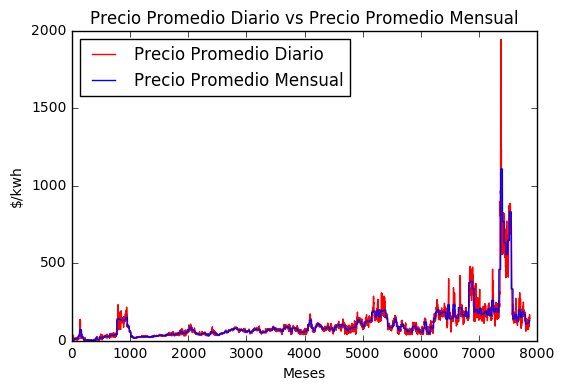

In [85]:
plt.xlabel("Meses")    
plt.ylabel("$/kwh")
plt.title('Precio Promedio Diario vs Precio Promedio Mensual')
plt.plot(pd.Series(z1mean).values, label= 'Precio Promedio Diario', color= 'r' )        
plt.plot(pd.Series(MeanMonth).values, label= 'Precio Promedio Mensual', color= 'b')
plt.legend(loc="upper left")